# Fake Bank Notes Detection / Classification 

### Dataset Reference: http://archive.ics.uci.edu/ml/datasets/banknote+authentication

### Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


### Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

In [1]:
# Import Relevant Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the DataSet from UCI Repository

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/'
file_name = 'data_banknote_authentication.txt'
raw_df = pd.read_csv(url+file_name, header=None) 
raw_df.head()

0       1       2        3  4
0  3.62160  8.6661 -2.8073 -0.44699  0
1  4.54590  8.1674 -2.4586 -1.46210  0
2  3.86600 -2.6383  1.9242  0.10645  0
3  3.45660  9.5228 -4.0112 -3.59440  0
4  0.32924 -4.4552  4.5718 -0.98880  0

In [4]:
# Assign the Column Names

column_names = ['wavelet_variance', 'wavelet_skewness', 'wavelet_curtosis', 'image_entropy', 'class']

raw_df.columns = column_names
raw_df.head()

wavelet_variance  wavelet_skewness  wavelet_curtosis  image_entropy  class
0           3.62160            8.6661           -2.8073       -0.44699      0
1           4.54590            8.1674           -2.4586       -1.46210      0
2           3.86600           -2.6383            1.9242        0.10645      0
3           3.45660            9.5228           -4.0112       -3.59440      0
4           0.32924           -4.4552            4.5718       -0.98880      0

In [5]:
# EDA

raw_df.shape

(1372, 5)

In [6]:
# Check for missing values in the dataset
raw_df.isnull().sum()

wavelet_variance    0
wavelet_skewness    0
wavelet_curtosis    0
image_entropy       0
class               0
dtype: int64

In [7]:
# Generate descriptive statistics
raw_df.describe(include='all')

wavelet_variance  wavelet_skewness  wavelet_curtosis  image_entropy  \
count       1372.000000       1372.000000       1372.000000    1372.000000   
mean           0.433735          1.922353          1.397627      -1.191657   
std            2.842763          5.869047          4.310030       2.101013   
min           -7.042100        -13.773100         -5.286100      -8.548200   
25%           -1.773000         -1.708200         -1.574975      -2.413450   
50%            0.496180          2.319650          0.616630      -0.586650   
75%            2.821475          6.814625          3.179250       0.394810   
max            6.824800         12.951600         17.927400       2.449500   

             class  
count  1372.000000  
mean      0.444606  
std       0.497103  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [8]:
# Check the Datatype of all the columns
# raw_df.dtypes
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wavelet_variance  1372 non-null   float64
 1   wavelet_skewness  1372 non-null   float64
 2   wavelet_curtosis  1372 non-null   float64
 3   image_entropy     1372 non-null   float64
 4   class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [10]:
# Check the number of 0s and 1s in the Class variable.
raw_df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

Text(0.5, 1.0, 'Proportion of Genuine and Fake Notes')

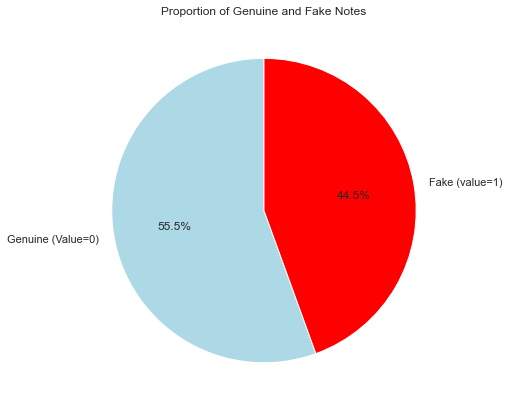

In [11]:
# Create a Pie Plot of the number of 0s and 1s in the Class variable
plt.figure(figsize=(7,7))
plt.pie(raw_df['class'].value_counts(), labels = ['Genuine (Value=0)', 
                                                   'Fake (value=1)'], autopct = '%.1f%%',
       colors = ["lightblue","red"], startangle=90)
plt.title('Proportion of Genuine and Fake Notes')

array([[<AxesSubplot:title={'center':'wavelet_variance'}>,
        <AxesSubplot:title={'center':'wavelet_skewness'}>],
       [<AxesSubplot:title={'center':'wavelet_curtosis'}>,
        <AxesSubplot:title={'center':'image_entropy'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

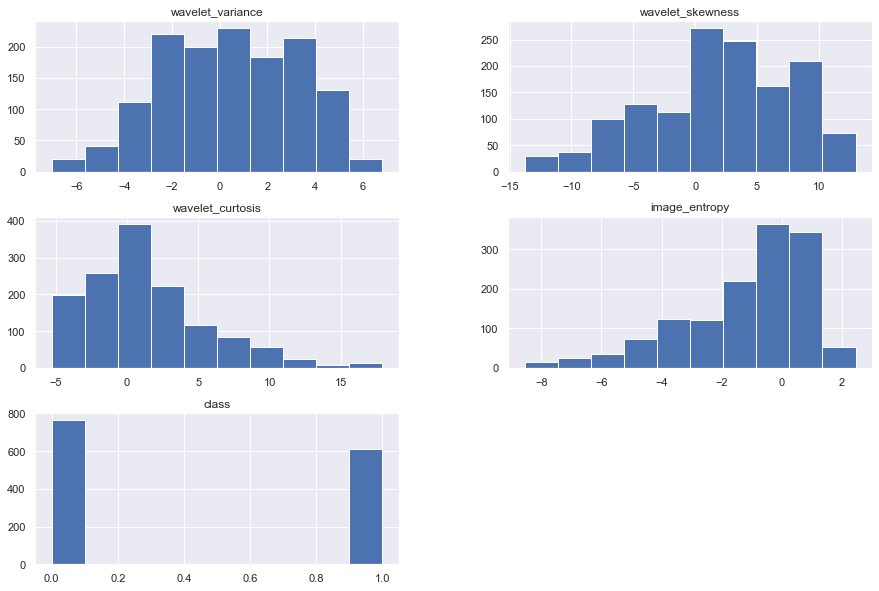

In [12]:
# Frequency Distribution Plots
raw_df.hist(figsize=[15,10])
# x-axis is the frequency

<Figure size 2880x2160 with 0 Axes>

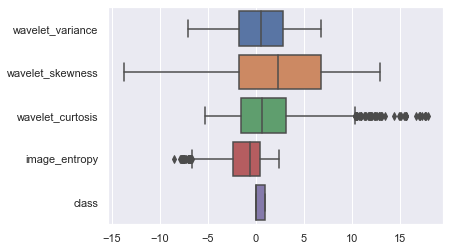

<Figure size 2880x2160 with 0 Axes>

In [13]:
sns.boxplot(data =raw_df, orient='h')
plt.figure(figsize =(40,30))

In [14]:
for i in range(len(raw_df.columns)):
    print(' The No. of values in {} are {}'.format(raw_df.columns[i], len(raw_df[raw_df.columns[i]].unique())))

 The No. of values in wavelet_variance are 1338
 The No. of values in wavelet_skewness are 1256
 The No. of values in wavelet_curtosis are 1270
 The No. of values in image_entropy are 1156
 The No. of values in class are 2


<AxesSubplot:>

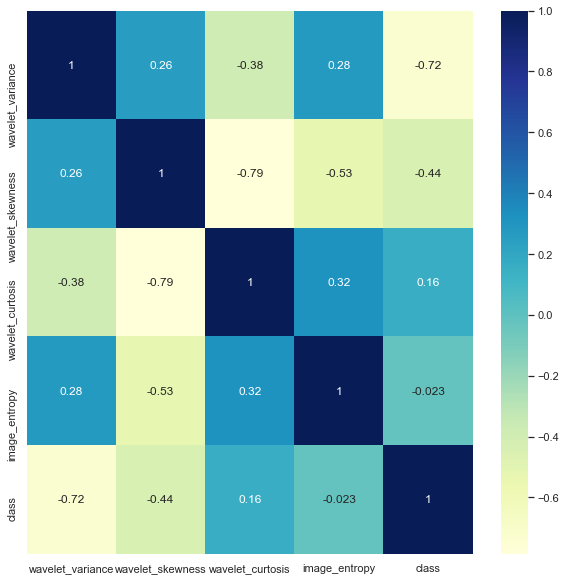

In [15]:
# Generate the Correlation Matrix and Plot it on the HeatMap
plt.figure(figsize=(10,10))
sns.heatmap(raw_df.corr(), cmap='YlGnBu', annot = True)

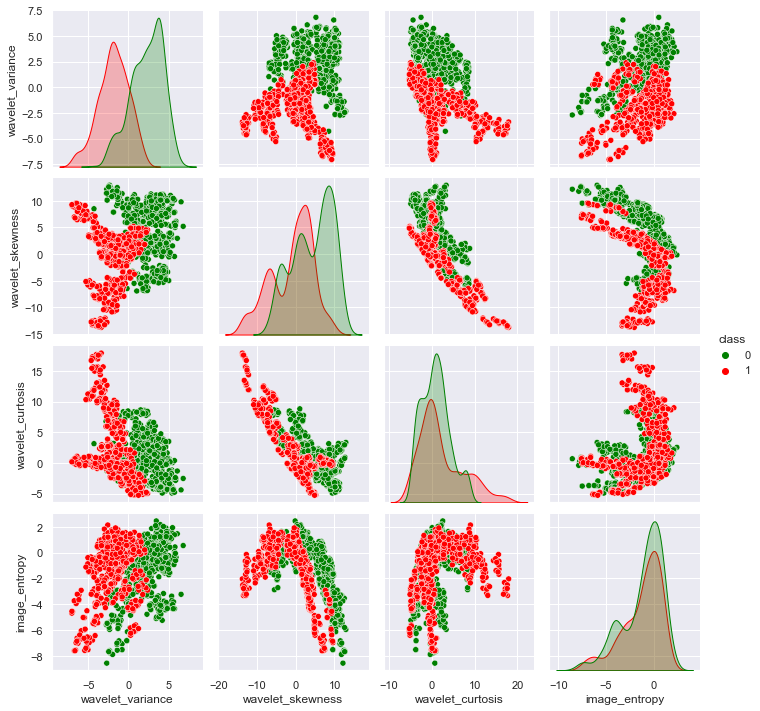

In [16]:
# Let's plot the Pairplot
# Pair plot gives the histogram for the diagonal axis and Scatter plot for off-diagonal axis
# The Y-scale corresponds to the off-diagonal axis plot and not corresponding to the diagonal axis plot.

sns.pairplot(raw_df, hue='class', palette=['green', 'red'])

### Declare Inputs and Targets

In [17]:
target = raw_df['class']
features = raw_df.drop(['class'], axis=1)

### Standardise the Data

In [23]:
# Standardisation is needed to bring all features to a cCommon Scale. 

# Standardisation is needed for Distance based ML Algorithms like PCA, Clustering, KNN, SVM, Lasso & Ridge Regression.

# Standardisation is not significant for Tree Based Algorithms.
# https://builtin.com/data-science/when-and-why-standardize-your-data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

### Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=200)

In [20]:
print('The size of the Resultant DataFrames is ')
print('x_train: {}' .format(x_train.shape))
print('y_train: {}' .format(y_train.shape))
print('x_test: {}' .format(x_test.shape))
print('y_test: {}' .format(y_test.shape))

The size of the Resultant DataFrames is 
x_train: (1097, 4)
y_train: (1097,)
x_test: (275, 4)
y_test: (275,)


## Models

### 1. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

LogisticRegression()

In [27]:
print('Train Data Accuracy Score:', accuracy_score(y_train, logistic_reg.predict(x_train)))
print('Test Data Accuracy Score:', accuracy_score(y_test, logistic_reg.predict(x_test)))
print('')

print('Confusion Matrix:')
cm= confusion_matrix(y_test, logistic_reg.predict(x_test))
print(cm)
print('')

print('f1_score', f1_score(y_test, logistic_reg.predict(x_test)))

Train Data Accuracy Score: 0.9881494986326345
Test Data Accuracy Score: 0.9963636363636363

Confusion Matrix:
[[154   1]
 [  0 120]]

f1_score 0.995850622406639


<AxesSubplot:>

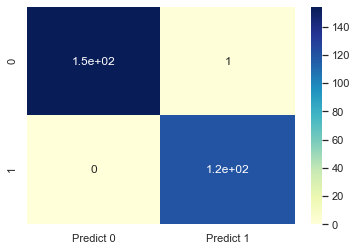

In [32]:
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [46]:
from sklearn.metrics import classification_report

print('classification_report for Logistic Regression')
print(classification_report(y_test, logistic_reg.predict(x_test)))

classification_report for Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       155
           1       0.99      1.00      1.00       120

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



### 2. KNN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # The default 'k' value in sklearn.neighbors.KNeighborsClassifier is 5.
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
print('Train Data Accuracy Score:', accuracy_score(y_train, knn.predict(x_train)))
print('Test Data Accuracy Score:', accuracy_score(y_test, knn.predict(x_test)))
print('')

print('Confusion Matrix:')
cm= confusion_matrix(y_test, knn.predict(x_test))
print(cm)
print('')

print('f1_score', f1_score(y_test, knn.predict(x_test)))

Train Data Accuracy Score: 1.0
Test Data Accuracy Score: 1.0

Confusion Matrix:
[[155   0]
 [  0 120]]

f1_score 1.0


In [44]:
print('classification_report for KNN Classifier')
print(classification_report(y_test, knn.predict(x_test)))

classification_report for KNN Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       120

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



### 3. SVM Classifier

In [33]:
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(x_train, y_train)

SVC(random_state=0)

In [37]:
print('Train Data Accuracy Score:', accuracy_score(y_train, svm.predict(x_train)))
print('Test Data Accuracy Score:', accuracy_score(y_test, svm.predict(x_test)))
print('')

print('Confusion Matrix:')
cm= confusion_matrix(y_test, svm.predict(x_test))
print(cm)
print('')

print('f1_score', f1_score(y_test, svm.predict(x_test)))

Train Data Accuracy Score: 1.0
Test Data Accuracy Score: 1.0

Confusion Matrix:
[[155   0]
 [  0 120]]

f1_score 1.0


<AxesSubplot:>

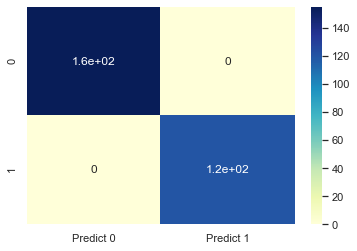

In [38]:
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [47]:
print('classification_report for SVM Classifier')
print(classification_report(y_test, svm.predict(x_test)))

classification_report for SVM Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       120

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

